In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def correlation(list1, list2):
    x_sum = 0
    y_sum = 0
    e1 = 0
    x_sq = 0
    y_sq = 0
    
    for num in range(len(list1)):
        x_sum += list1[num]
        y_sum += list2[num]
        e1+=  list1[num]*list2[num]
        x_sq += list1[num]**2
        y_sq += list2[num]**2
    
    e1= e1* len(list1)
    
    x_sq_sub = (x_sq *len(list1)) - x_sum**2
    x_sqed = math.sqrt(x_sq_sub)
    
    y_sq_sub = (y_sq * len(list2)) - y_sum**2
    y_sqed = math.sqrt(y_sq_sub)
    
    top = e1 - (x_sum * y_sum)
    bottom = x_sqed*y_sqed
    
    corr = top / bottom
    
    return corr
    
def least_squares(list1, list2):
    x_sq = 0
    x_sum = 0
    xy_sum = 0
    y_sum = 0
    
    for num in range(len(list1)):
        x_sq += list1[num]**2
        x_sum += list1[num]
        xy_sum += list1[num] * list2[num]
        y_sum += list2[num]
        
    A = [[x_sq, x_sum], [x_sum, len(list1)]]
    B = [xy_sum, y_sum]
    
    array_reg = np.array(A)
    array_inverse = np.linalg.inv(array_reg)
    answer = np.dot(array_inverse, B)
    return answer

def scatter_plot(x_list, y_list, color='blue', point='o'):
    plt.scatter(x_list, y_list, c=color, marker=point)
    plt.show()
    
def line_graph(x_list, y_list, x_label = None, y_label = None, amount=1, colour='blue', mark="o", line='-'):
    '''amount is number of lines on a graph. if the amount is greater than one, submit lists of lists for the other three paramters. ex: amount=1, x_list=[1,2,3] or amount=2, x_list=[[1,2,3],[4,5,6]]'''
    if amount >1:
        for num in range(0, amount):
            plt.plot(x_list[num], y_list[num], color=colour[num], marker=mark[num], linestyle=line[num])
    else:
        plt.plot(x_list, y_list, color=colour, marker=mark, linestyle=line)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()
    
def slope_to_points(slope, intercept, point_nums):
    list_x = []
    list_y = []
    for num in point_nums:
        list_x.append(num)
        y_point = slope * num + intercept
        list_y.append(y_point)
    return list_x, list_y

def mean(data):
    sum = 0
    for val in data:
        sum += val
    average = sum/len(data)
    return average

def variance(data):
    sum = 0
    for num in data:
        sum += (num - mean(data))**2
    vari = sum/len(data)
    return vari

def stand_dev(data):
    de = math.sqrt(variance(data))
    return de

def residuals(x_list, y_list, slope, intercept):
    res_list = []

    for item in range(0,len(x_list)):
        res = y_list[item] - (slope * x_list[item] + intercept)
        res_list.append(res)
        
    res_mean = mean(res_list)
    res_deviation = stand_dev(res_list)
    
    return res_list, res_mean, res_deviation

def outlier_finder(x_list, y_list, n, dev_list, mean, deviation):
    outliers = []
    for num in range(0,len(dev_list)):
        if dev_list[num] > mean + n*deviation:
            outliers.append(dev_list[num])
        elif dev_list[num] < mean - n*deviation:
            outliers.append(dev_list[num])
        else:
            continue
    for item in outliers:
        x_list.pop(dev_list.index(item))
        y_list.pop(dev_list.index(item))
        dev_list.remove(item)
            
    return x_list, y_list

def rmse(y_list, least_y):
    sum = 0
    for num in range(0,len(y_list)):
        sum += (y_list[num]-least_y[num])**2
    sum = sum/2
    final = np.sqrt(sum)
    return final

Write a function that takes as input the coefficients of the least squares fit and the x and y lists
used for the fit. The function should compute the mean and standard deviation for the residuals to the
least squares fit. The function should return a list of the residuals, and the residuals mean and standard
deviation.

Using the outputs from the above function and a user input number of standard deviations, write
a function that will identify any outliers in the data. If there are outliers present return a list that contains
the indices corresponding to the outliers. Use the list of indices to remove the outliers from your data and
refit your data then call your modified plotting routine to replot the new data set.

Modify the routine you wrote to plot the least squares regression in a previous exercise to also
plot error bars based on the statistics you calculated from the residuals including any outliers. Let the user
specify the number of standard deviations to be used for the outlier calculation.

* residual = each y - the slope * each x + the intercept
* residual >< mean +- inputed number (1,2,3) * standard deviation

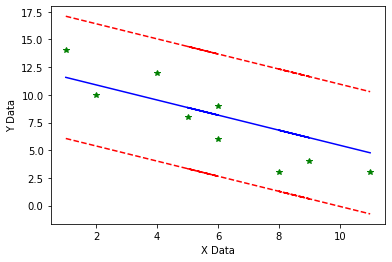

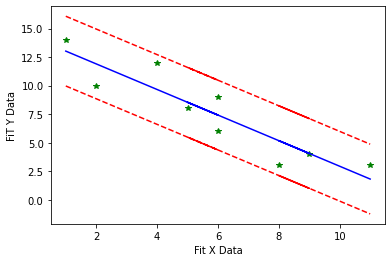

In [3]:
x = [1.0,2.0,4.0,6.0,5.0,6.0,9.0,8.0,11.0,12.0]
y = [14.0,10.0,12.0,9.0,8.0,6.0,4.0,3.0,3.0,10.0]

confidence = 2

data_slope, data_intercept = least_squares(x,y)
data_r, data_rmean, data_rdev = residuals(x,y,data_slope, data_intercept)
new_x, new_y = outlier_finder(x,y,confidence,data_r, data_rmean, data_rdev)

least_line_x, least_line_y = slope_to_points(data_slope, data_intercept, x)

ubx, uby = slope_to_points(data_slope, data_intercept + (data_rmean + confidence * data_rdev), new_x)
lbx, lby = slope_to_points(data_slope, data_intercept - (data_rmean + confidence * data_rdev), new_x)


fit_slope, fit_intercept = least_squares(new_x, new_y)
fit_data_r, fit_data_rmean, fit_data_rdev = residuals(new_x,new_y,fit_slope, fit_intercept)
fit_xs, fit_ys = slope_to_points(fit_slope, fit_intercept, new_x)
fit_ubx, fit_uby = slope_to_points(fit_slope, fit_intercept + (fit_data_rmean + confidence * fit_data_rdev), new_x)
fit_lbx, fit_lby = slope_to_points(fit_slope, fit_intercept - (fit_data_rmean + confidence * fit_data_rdev), new_x)

line_graph([x,least_line_x, ubx, lbx], [y,least_line_y, uby, lby], x_label = "X Data", y_label = "Y Data", amount=4, colour=["green", "blue", "red", "red"], mark=["*", "", "", ""], line=["", "-", "--", "--"])
line_graph([x,fit_xs, fit_ubx, fit_lbx], [y,fit_ys, fit_uby, fit_lby], x_label = "Fit X Data", y_label = "FiT Y Data", amount=4, colour=["green", "blue", "red", "red"], mark=["*", "", "", ""], line=["", "-", "--", "--"])

In [4]:
print(data_slope, fit_slope)
print()
rmse_data = rmse(new_y, fit_ys)
rmse_data_old = rmse(y, least_line_y)
print(rmse_data, rmse_data_old)

-0.6807432432432439 -1.1210106382978715

3.240267752267238 4.532021246799961
